<a href="https://colab.research.google.com/github/suacalis/HR_Analytics/blob/master/Chapter_8_RECRUITMENT_APPLICANTS_Edwards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyreadstat

     |████████████████████████████████| 2.4 MB 5.1 MB/s 


In [ ]:
import pyreadstat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ApplicantCode: applicant code, ranging from 1 to 280.

Gender: 1 = male | 2 = female

BAMEyn: Black, Asian or Minority Ethnic, 1 = yes | 2 = no

ShortlistedNY: 0 = applicant rejected | 1 = shorlisted

Interviewed: 0 = applicant not interviewed | 1 = interviewed

FemaleONpanel: 1 = male only panel | 2 = female interviewer included on the interview panel

OfferNY: 1 = offer made to the applicant | 0 = not offered

AcceptNY: 1 = applicant accepted | 0 = declined

JoinYN: 1 = applicant joined | 0 = not joined

In [3]:
df=pd.read_excel('/content/drive/MyDrive/HR Analytics/Edwards Predictive HR analytics/Edwards Predictive Hr Analytics/SPSS and Excel Datasets (9780749484446)/Chapter 8 RECRUITMENT APPLICANTS.xls')

In [4]:
df.head()

,ApplicantCode,Gender,BAMEyn,ShortlistedNY,Interviewed,FemaleONpanel,OfferNY,AcceptNY,JoinYN
0,1,1,2,1,1,1.0,1.0,1.0,1.0
1,2,1,2,1,1,1.0,1.0,1.0,1.0
2,3,1,2,1,1,1.0,1.0,1.0,1.0
3,4,1,2,1,1,2.0,1.0,1.0,1.0
4,5,1,2,1,1,2.0,0.0,NaN,NaN


In [5]:
df.tail()

,ApplicantCode,Gender,BAMEyn,ShortlistedNY,Interviewed,FemaleONpanel,OfferNY,AcceptNY,JoinYN
275,276,2,1,0,0,NaN,NaN,NaN,NaN
276,277,2,1,0,0,NaN,NaN,NaN,NaN
277,278,2,1,0,0,NaN,NaN,NaN,NaN
278,279,2,2,0,0,NaN,NaN,NaN,NaN
279,280,2,2,0,0,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ApplicantCode  280 non-null    int64  
 1   Gender         280 non-null    int64  
 2   BAMEyn         280 non-null    int64  
 3   ShortlistedNY  280 non-null    int64  
 4   Interviewed    280 non-null    int64  
 5   FemaleONpanel  55 non-null     float64
 6   OfferNY        55 non-null     float64
 7   AcceptNY       28 non-null     float64
 8   JoinYN         28 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 19.8 KB


In [ ]:
df2=pd.read_spss('/content/drive/MyDrive/HR Analytics/Edwards Predictive HR analytics/Chapter 8 RECRUITMENT APPLICANTS.sav')

In [ ]:
df2.head()

,ApplicantCode,Gender,BAMEyn,ShortlistedNY,Interviewed,FemaleONpanel,OfferNY,AcceptNY,JoinYN
0,1.0,Male,BAME No,Shortlisted,Interviewed,Male only,Offer Made,Accepted,Joined
1,2.0,Male,BAME No,Shortlisted,Interviewed,Male only,Offer Made,Accepted,Joined
2,3.0,Male,BAME No,Shortlisted,Interviewed,Male only,Offer Made,Accepted,Joined
3,4.0,Male,BAME No,Shortlisted,Interviewed,Female panel member,Offer Made,Accepted,Joined
4,5.0,Male,BAME No,Shortlisted,Interviewed,Female panel member,Offer not made,NaN,NaN


In [7]:
df.isnull().sum()

ApplicantCode      0
Gender             0
BAMEyn             0
ShortlistedNY      0
Interviewed        0
FemaleONpanel    225
OfferNY          225
AcceptNY         252
JoinYN           252
dtype: int64

In [8]:
df.dtypes

ApplicantCode      int64
Gender             int64
BAMEyn             int64
ShortlistedNY      int64
Interviewed        int64
FemaleONpanel    float64
OfferNY          float64
AcceptNY         float64
JoinYN           float64
dtype: object

In [9]:
#1= Male, 2= Female
print(df.Gender.value_counts(dropna=False))
print(df.Gender.value_counts(normalize=True)*100)

2    202
1     78
Name: Gender, dtype: int64
2    72.142857
1    27.857143
Name: Gender, dtype: float64


In [10]:
#1= Black, Asian or Minority Ethnic, 2= No
print(df.BAMEyn.value_counts(dropna=False))
print(df.BAMEyn.value_counts(normalize=True)*100)

2    159
1    121
Name: BAMEyn, dtype: int64
2    56.785714
1    43.214286
Name: BAMEyn, dtype: float64


In [11]:
#ShortlistedNY: 0 = applicant rejected | 1 = shorlisted
print(df.ShortlistedNY.value_counts(dropna=False))
print(df.ShortlistedNY.value_counts(normalize=True)*100)


0    192
1     88
Name: ShortlistedNY, dtype: int64
0    68.571429
1    31.428571
Name: ShortlistedNY, dtype: float64


In [ ]:
#Interviewed: 0 = applicant not interviewed | 1 = interviewed
print(df.Interviewed.value_counts(dropna=False))
print(df.Interviewed.value_counts(normalize=True)*100)

0    225
1     55
Name: Interviewed, dtype: int64
0    80.357143
1    19.642857
Name: Interviewed, dtype: float64


In [ ]:
#FemaleONpanel: 1 = male only panel | 2 = female interviewer included on the interview panel
print(df.FemaleONpanel.value_counts(dropna=False))
print(df.FemaleONpanel.value_counts(dropna=False, normalize=True)*100)

NaN    225
1.0     33
2.0     22
Name: FemaleONpanel, dtype: int64
NaN    80.357143
1.0    11.785714
2.0     7.857143
Name: FemaleONpanel, dtype: float64


In [12]:
#FemaleONpanel: 1 = male only panel | 2 = female interviewer included on the interview panel
print(df.FemaleONpanel.value_counts())
print(df.FemaleONpanel.value_counts(normalize=True)*100)

1.0    33
2.0    22
Name: FemaleONpanel, dtype: int64
1.0    60.0
2.0    40.0
Name: FemaleONpanel, dtype: float64


In [13]:
#OfferNY: 1 = offer made to the applicant | 0 = not offered
print(df.OfferNY.value_counts(dropna=False))
print(df.OfferNY.value_counts(dropna=False, normalize=True)*100)


NaN    225
1.0     28
0.0     27
Name: OfferNY, dtype: int64
NaN    80.357143
1.0    10.000000
0.0     9.642857
Name: OfferNY, dtype: float64


In [14]:
#AcceptNY: 1 = applicant accepted | 0 = declined
print(df.AcceptNY.value_counts(dropna=False))
print(df.AcceptNY.value_counts(dropna=False, normalize=True)*100)

NaN    252
1.0     18
0.0     10
Name: AcceptNY, dtype: int64
NaN    90.000000
1.0     6.428571
0.0     3.571429
Name: AcceptNY, dtype: float64


In [15]:
#JoinYN: 1 = applicant joined | 0 = not joined
print(df.JoinYN.value_counts(dropna=False))
print(df.JoinYN.value_counts(dropna=False, normalize=True)*100)

NaN    252
1.0     18
0.0     10
Name: JoinYN, dtype: int64
NaN    90.000000
1.0     6.428571
0.0     3.571429
Name: JoinYN, dtype: float64


In [16]:
#1= Male, 2= Female
print(df.Gender.value_counts(dropna=False))
#ShortlistedNY: 0 = applicant rejected | 1 = shorlisted
print(pd.crosstab(df['Gender'], df['ShortlistedNY']))

2    202
1     78
Name: Gender, dtype: int64
ShortlistedNY    0   1
Gender                
1               40  38
2              152  50


In [ ]:
contigency= pd.crosstab(df['Gender'], df['ShortlistedNY'],normalize='index')

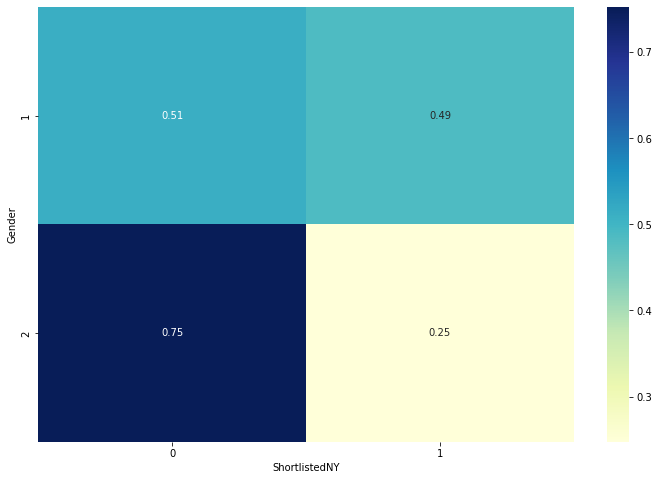

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [17]:
# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(df['Gender'], df['ShortlistedNY']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 13.905157342657343, p-value: 0.00019227016669192619


In [18]:
chi_res2 = chi2_contingency(pd.crosstab(df['BAMEyn'], df['ShortlistedNY']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res2[0], chi_res2[1]))

Chi2 Statistic: 23.18417096270675, p-value: 1.4720402657609345e-06


In [19]:
chi_res3 = chi2_contingency(pd.crosstab(df['Gender'], df['Interviewed']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res3[0], chi_res3[1]))

Chi2 Statistic: 14.068750464790071, p-value: 0.0001762478497822533


In [20]:
chi_res4 = chi2_contingency(pd.crosstab(df['BAMEyn'], df['Interviewed']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res4[0], chi_res4[1]))

Chi2 Statistic: 9.720889964145849, p-value: 0.0018218527537953782


In [ ]:
chi_res4 = chi2_contingency(pd.crosstab(df['FemaleONpanel'], df['Interviewed']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res4[0], chi_res4[1]))